In [269]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from recova.util import wishart_kl_divergence, wishart_likelihood

np.set_printoptions(precision=3, linewidth=100)

In [301]:
n0 = 6
base = 0.5 * np.identity(6) / n0

n1 = 1000
prediction = 0.5 * np.identity(6) / n1

In [302]:
wishart_kl_divergence(base, n0, prediction, n1)

[[0.083 0.    0.    0.    0.    0.   ]
 [0.    0.083 0.    0.    0.    0.   ]
 [0.    0.    0.083 0.    0.    0.   ]
 [0.    0.    0.    0.083 0.    0.   ]
 [0.    0.    0.    0.    0.083 0.   ]
 [0.    0.    0.    0.    0.    0.083]]
[[0.001 0.    0.    0.    0.    0.   ]
 [0.    0.001 0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.    0.   ]
 [0.    0.    0.    0.001 0.    0.   ]
 [0.    0.    0.    0.    0.001 0.   ]
 [0.    0.    0.    0.    0.    0.001]]
Det vdiff: 30.695974858524494
Trace vdiff: 993.9999999999999
Gammas: 15582.677413763644
Trigamma: -196.28223122356854


3020.407753277829

In [285]:
scipy.special.multigammaln(10000, 6)

492537.81396259577

In [264]:
xs = np.linspace(6, 1000, 50)
meshgrid_x, meshgrid_y = np.meshgrid(xs, xs)

z = np.empty((50, 50))
for i in range(50):
    for j in range(50):
        z[i][j] = third_term(meshgrid_x[i][j], meshgrid_y[i][j])

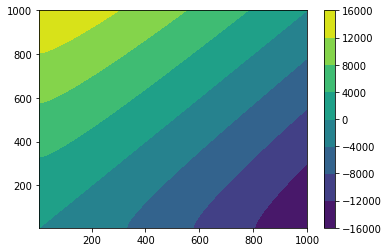

In [267]:
plt.contourf(meshgrid_x, meshgrid_y, z)
plt.colorbar()
plt.show()

In [268]:
def third_term(base, pred):
    return scipy.special.multigammaln(pred / 2., 6) - scipy.special.multigammaln(base / 2., 6)

In [309]:
third_term(999, 1000)

18.631796198873417

In [433]:
a = np.array([[3.0, 4, 5.0],
         [4.0, 2.0, 0.0],
         [5.0, 0.0, 1.0]])

b = np.array([[2.0, 0.0, 0.0],
              [0.0, 3.0, 0.0],
              [0.0, 0.0, 1.0]])

In [434]:
va, qa = np.linalg.eig(a)

sort_indexes = np.argsort(va)
va = va[sort_indexes]
qa = qa[:,sort_indexes]

In [435]:
va

array([-4.281,  1.618,  8.663])

In [436]:
qa

array([[ 0.659,  0.075,  0.748],
       [-0.42 , -0.789,  0.449],
       [-0.624,  0.61 ,  0.488]])

In [437]:
vb, qb = np.linalg.eig(b)

sort_indexes = np.argsort(vb)
vb = vb[sort_indexes]
qb = qb[:,sort_indexes]

In [438]:
qb

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [439]:
for i in range(3):
    print(np.dot(qa[:,i], qb[:,i]))
    print(qa[:,i])
    print(qb[:,i])

-0.6240191791510917
[ 0.659 -0.42  -0.624]
[0. 0. 1.]
0.07537739853294521
[ 0.075 -0.789  0.61 ]
[1. 0. 0.]
0.4491764093609724
[0.748 0.449 0.488]
[0. 1. 0.]


In [440]:
(a + b) / 2

array([[2.5, 2. , 2.5],
       [2. , 2.5, 0. ],
       [2.5, 0. , 1. ]])

In [465]:
diag = np.diag(va + vb / 2)
q = qa + qb / 2

for i in range(3):
    q[:,i] = q[:,i] / np.linalg.norm(q[:,i])

In [466]:
q

array([[ 0.833,  0.5  ,  0.574],
       [-0.531, -0.685,  0.728],
       [-0.157,  0.53 ,  0.375]])

In [464]:
np.dot(q[:,0], q[:,2])    

0.033193555764041795

In [443]:
diag

array([[-3.781,  0.   ,  0.   ],
       [ 0.   ,  2.618,  0.   ],
       [ 0.   ,  0.   , 10.163]])

In [444]:
print(qa)
print(qb)

[[ 0.659  0.075  0.748]
 [-0.42  -0.789  0.449]
 [-0.624  0.61   0.488]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [447]:
ans_b = np.dot(q, np.dot(diag, q.T))

In [448]:
ans_a = (a + b) / 2

In [454]:
ans_a

array([[2.5, 2. , 2.5],
       [2. , 2.5, 0. ],
       [2.5, 0. , 1. ]])

In [455]:
ans_b

array([[1.379, 5.023, 3.372],
       [5.023, 5.553, 1.507],
       [3.372, 1.507, 2.068]])

In [459]:
np.linalg.norm(ans_a)

5.830951894845301

In [460]:
np.linalg.norm(ans_b)

10.712613442529252

In [453]:
np.sqrt(9.2347)

3.0388649196698427